In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
df=pd.read_csv('/content/Assignment - Junior Data Analyst.csv')

In [222]:
# Remove "mAh Battery" from the battery column
df['battery'] = df['battery'].str.replace('mAh Battery', '',regex=False)
df['battery'] = df['battery'].str.replace('mAh Li-Ion Battery', '',regex=False)
df['battery'] = df['battery'].str.replace('mAh Li-ion Polymer Battery', '',regex=False)

for battery in df.select_dtypes(include='object').battery:
    df['battery'] = df['battery'].str.extract('(\d+)')
df['battery'] = df['battery'].astype(int)

In [223]:
# Remove the word "Reviews" and commas
df['reviews'] = df['reviews'].str.replace('Reviews', '', regex=False)
df['reviews'] = df['reviews'].str.replace(',', '').str.strip()

df.head()

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
0,5000,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,55078,Brand Warranty of 1 Year Available for Mobile ...
1,5000,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,20062,Sunrise Design
2,5000,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,20062,Sunrise Design
3,5000,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,20062,Sunrise Design
4,4000,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,10091,Dual Nano SIM slots and Memory Card Slot


In [224]:
#Rename of columns
df.rename(columns={'rating': 'Rating','battery': 'Battery','display': 'Display','memory': 'Memory',
                   'name': 'Name','rating': 'Rating','price': 'Price','processor': 'Processor',
                   'reviews': 'Reviews','warranty': 'Warranty','camera':'Camera'}, inplace=True)
df.head()

,Battery,Camera,Display,Memory,Name,Price,Processor,Rating,Reviews,Warranty
0,5000,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,55078,Brand Warranty of 1 Year Available for Mobile ...
1,5000,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,20062,Sunrise Design
2,5000,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,20062,Sunrise Design
3,5000,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,20062,Sunrise Design
4,4000,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,10091,Dual Nano SIM slots and Memory Card Slot


In [225]:
#Splitting the Memory Column

df[['RAM', 'ROM', 'Expandable']] = df['Memory'].str.split(' \| ', expand=True)
df.drop(columns=['Memory'], inplace=True)
df.drop(columns=['Expandable'], inplace=True)


In [226]:
#Splitting the Display column in Display_Size and Display_Quality

df[['Display_Size','Display_Quality']] = df['Display'].str.replace(r'\(\d+(\.\d+)? inch\)', '', regex=True).str.strip().str.split('cm', expand=True)
df.drop(columns=['Display'], inplace=True)

In [227]:
df.head()

,Battery,Camera,Name,Price,Processor,Rating,Reviews,Warranty,RAM,ROM,Display_Size,Display_Quality
0,5000,12MP + 2MP | 8MP Front Camera,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,55078,Brand Warranty of 1 Year Available for Mobile ...,4 GB RAM,64 GB ROM,15.8,HD+ Display
1,5000,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,20062,Sunrise Design,4 GB RAM,64 GB ROM,16.56,HD+ Display
2,5000,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,20062,Sunrise Design,4 GB RAM,128 GB ROM,16.56,HD+ Display
3,5000,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,20062,Sunrise Design,4 GB RAM,128 GB ROM,16.56,HD+ Display
4,4000,13MP + 2MP | 5MP Front Camera,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,10091,Dual Nano SIM slots and Memory Card Slot,3 GB RAM,32 GB ROM,15.49,HD+ Display


In [228]:
def missing_values(df):

    missing_count = df.isnull().sum()
    value_count = df.isnull().count()
    missing_percentage = round(missing_count / value_count * 100, 2)
    missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
    return missing_df

missing_values(df)

,count,percentage
Battery,0,0.00
Camera,0,0.00
Name,0,0.00
Price,0,0.00
Processor,1,0.10
Rating,13,1.32
Reviews,13,1.32
Warranty,148,15.04
RAM,0,0.00
ROM,0,0.00


Dropping NaN values

In [229]:
df.dropna(subset=['Processor','Rating','Reviews','Warranty'], inplace=True)

In [230]:
df['Display_Size']=df['Display_Size'].astype(float)

In [231]:
df.drop('Warranty',inplace=True,axis=1)
df.drop(df[df.Rating.isnull()].index,inplace=True,axis=0)
df.drop(df[df['Processor'].isnull()].index,inplace=True,axis=0)

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 828 entries, 0 to 983
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Battery          828 non-null    int64  
 1   Camera           828 non-null    object 
 2   Name             828 non-null    object 
 3   Price            828 non-null    int64  
 4   Processor        828 non-null    object 
 5   Rating           828 non-null    float64
 6   Reviews          828 non-null    object 
 7   RAM              828 non-null    object 
 8   ROM              828 non-null    object 
 9   Display_Size     828 non-null    float64
 10  Display_Quality  828 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 77.6+ KB


In [233]:
df.describe()

,Battery,Price,Rating,Display_Size
count,828.000000,828.000000,828.000000,828.000000
mean,3926.944444,15991.525362,4.287681,15.483225
std,845.878456,11920.820579,0.248221,1.380862
min,1300.000000,1999.000000,2.700000,8.890000
25%,3340.000000,8296.750000,4.200000,15.210000
50%,4000.000000,12990.000000,4.400000,15.900000
75%,4500.000000,18992.250000,4.500000,16.510000
max,6000.000000,97999.000000,4.800000,17.780000


# Univariate analysis

In [234]:
df.columns

Index(['Battery', 'Camera', 'Name', 'Price', 'Processor', 'Rating', 'Reviews',
       'RAM', 'ROM', 'Display_Size', 'Display_Quality'],
      dtype='object')

#Top 10 battery

<Axes: xlabel='Battery', ylabel='count'>

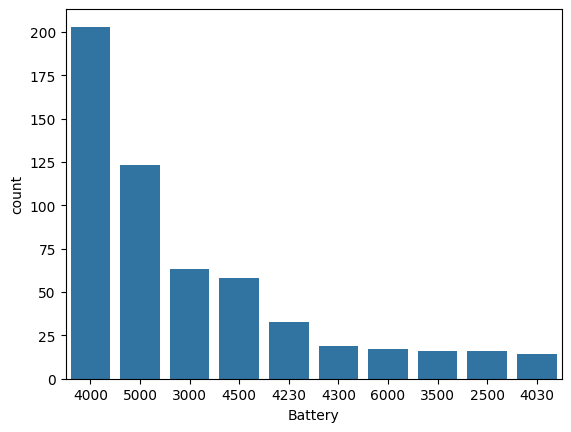

In [235]:
sns.countplot(x='Battery',data=df,order=df['Battery'].value_counts()[:10].index)

From the above Bar Diagram we can conclude that most people prefer to use phone having a 4000 mah battery.

#Top 6 Camera

<Axes: ylabel='count'>

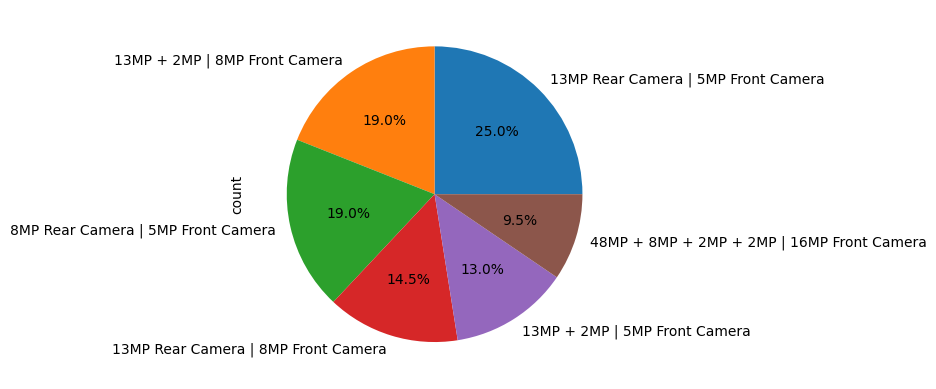

In [236]:
df['Camera'].value_counts()[:6].plot(kind='pie', autopct='%1.1f%%')

From the above pie chart we can conclude that most people prefer to buy a phone which phone have a higher mega pixel camera of rear camera  and front camera .

<Axes: xlabel='Rating', ylabel='count'>

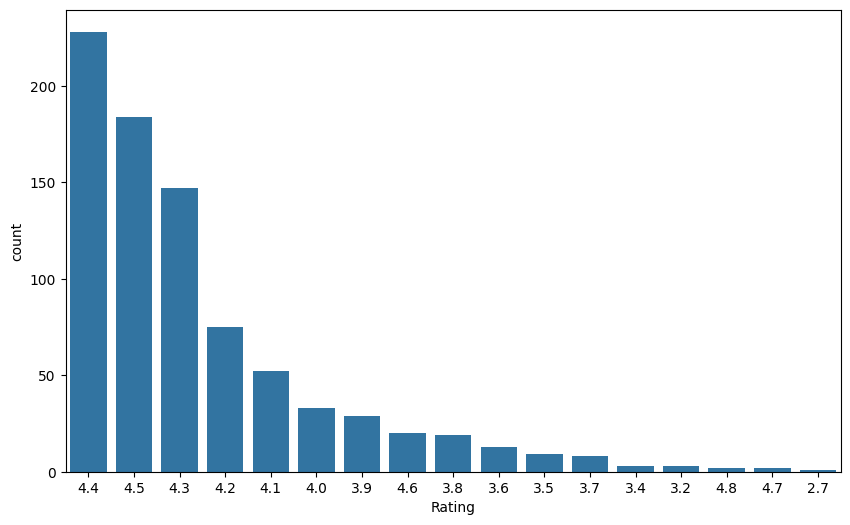

In [237]:
plt.figure(figsize=(10,6))
sns.countplot(x='Rating',data=df,order=df['Rating'].value_counts().index)

From the above bar diagram we can conclude that 76.5% of the people given above  4.3 rating .

<Axes: xlabel='Display_Size', ylabel='count'>

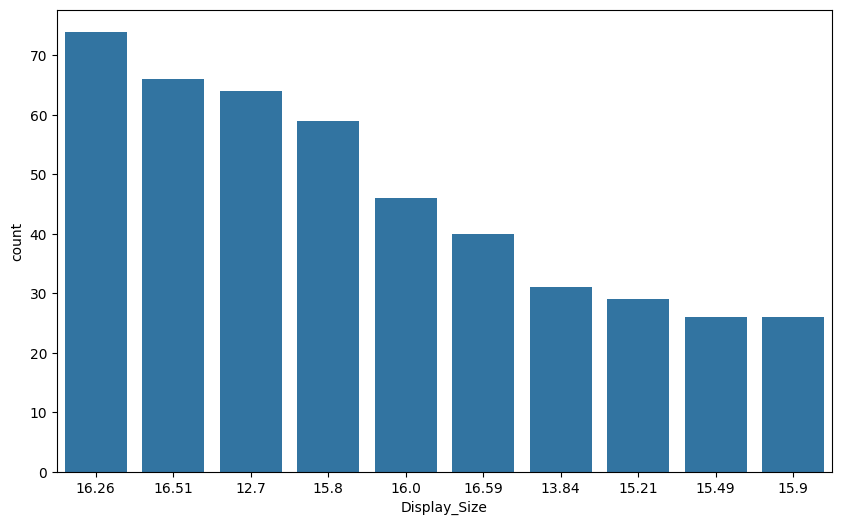

In [238]:
plt.figure(figsize=(10,6))
sns.countplot(x='Display_Size',data=df,order=df['Display_Size'].value_counts().index[:10])


<Axes: xlabel='RAM', ylabel='count'>

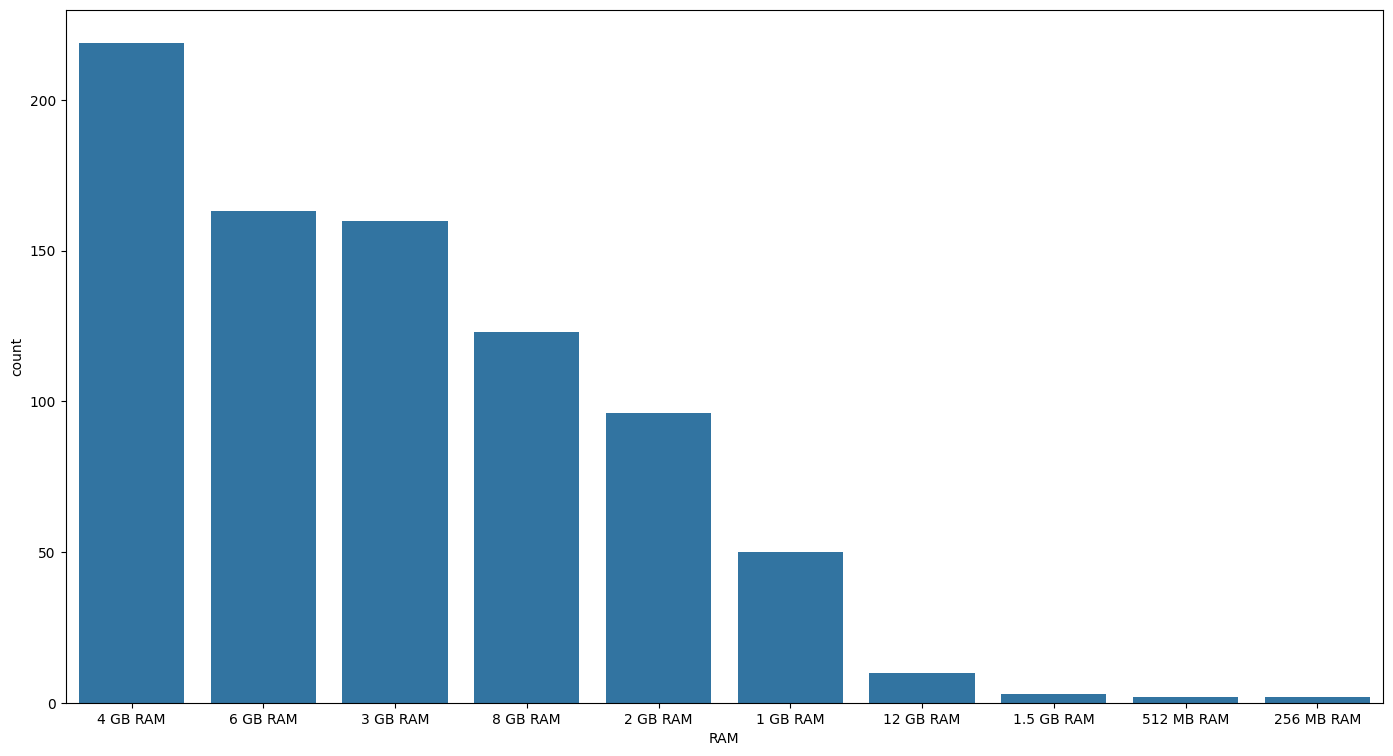

In [239]:
plt.figure(figsize=(17,9))
sns.countplot(x='RAM',data=df,order=df['RAM'].value_counts().index)

From the above Bar diagram we can conclude that about 26.4% people using 4 GB Ram ,19.6% people prefer to use 6 RAM and most hardly people are attraced to the phone which have a higher RAM it is hardly about 0.8%.

<Axes: xlabel='ROM', ylabel='count'>

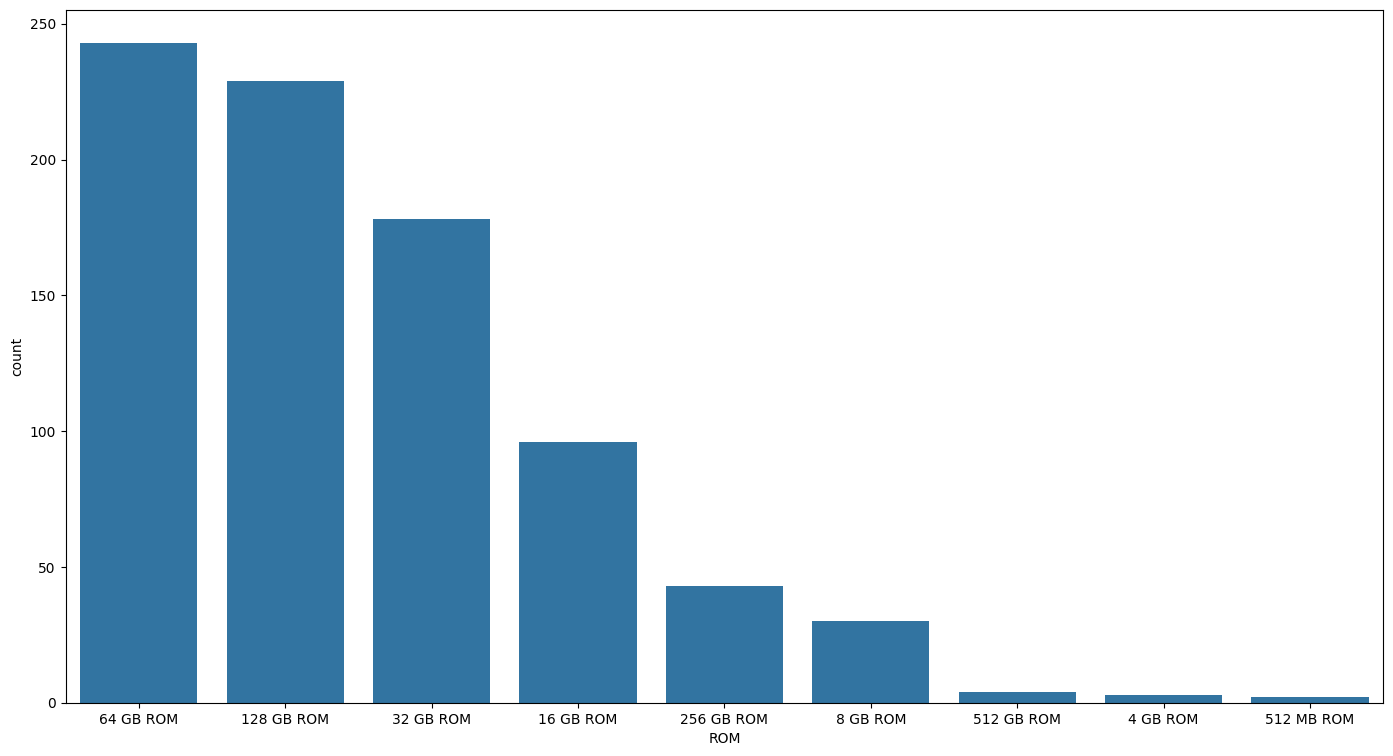

In [240]:
plt.figure(figsize=(17,9))
sns.countplot(x='ROM',data=df,order=df['ROM'].value_counts().index)

From the above bar diagram we can conclude that people most favourite category is 64 GB  ROM phone which is about 29.34%

<Axes: ylabel='count'>

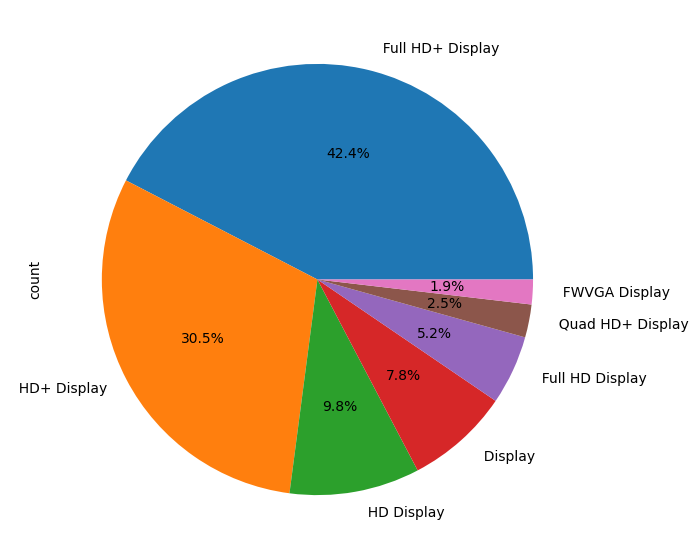

In [241]:
plt.figure(figsize=(14,7))
df['Display_Quality'].value_counts()[:7].plot(kind='pie', autopct='%1.1f%%')

From the above pie chart diagram we can conlude the most of the people prefer to buy HD + Display and Full HD + Display which is about 65.1%

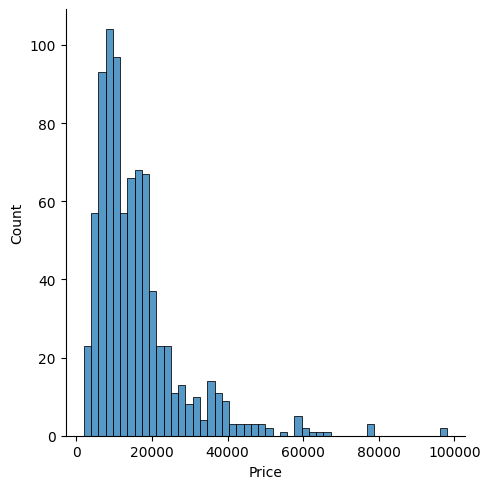

In [242]:
sns.displot(df['Price'],bins=50)



From the above hist plot we can conclude that most people buying phone under 20000 thousand

<Axes: ylabel='count'>

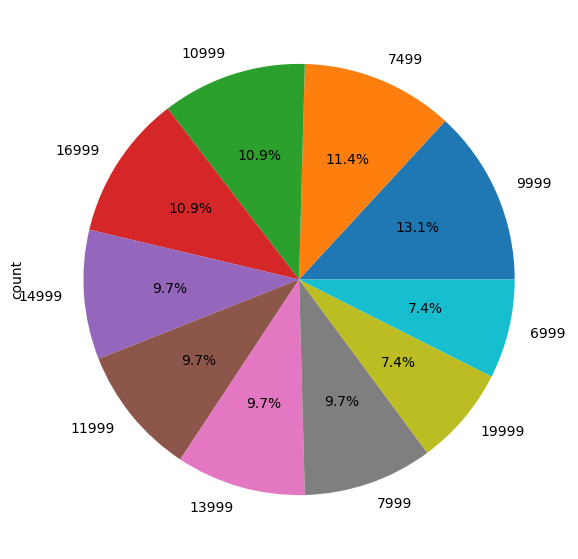

In [243]:
plt.figure(figsize=(14,7))
df['Price'].value_counts()[:10].plot(kind='pie', autopct='%1.1f%%')

From the above pie diagram we can conclude that most of the people prefer to buy a phone mid range of 10000-25000 thousand in a range.

<Axes: xlabel='Price'>

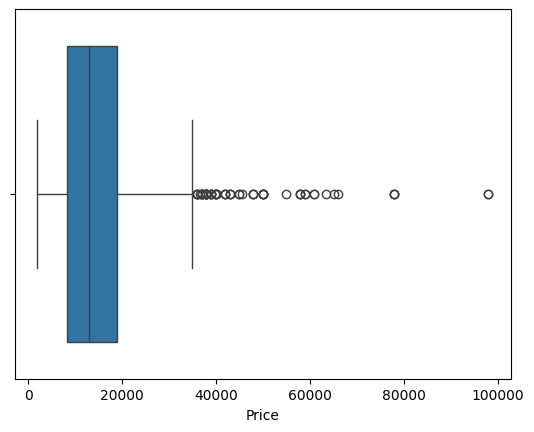

In [244]:
sns.boxplot(x=df['Price'])


From the above Boxplot we can conclude that most of the people  buying the phone under 40000 thousand only and hardly people are buying above 80000 thosand phone .


# Bivariate  analysis

In [245]:
df.columns

Index(['Battery', 'Camera', 'Name', 'Price', 'Processor', 'Rating', 'Reviews',
       'RAM', 'ROM', 'Display_Size', 'Display_Quality'],
      dtype='object')

In [246]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df_label=pd.DataFrame(oe.fit_transform(df.select_dtypes(include='object')),columns=df.select_dtypes(include='object').columns)

In [247]:
df_label=pd.concat([df_label,df.select_dtypes(exclude='object')],axis=1)

<Axes: >

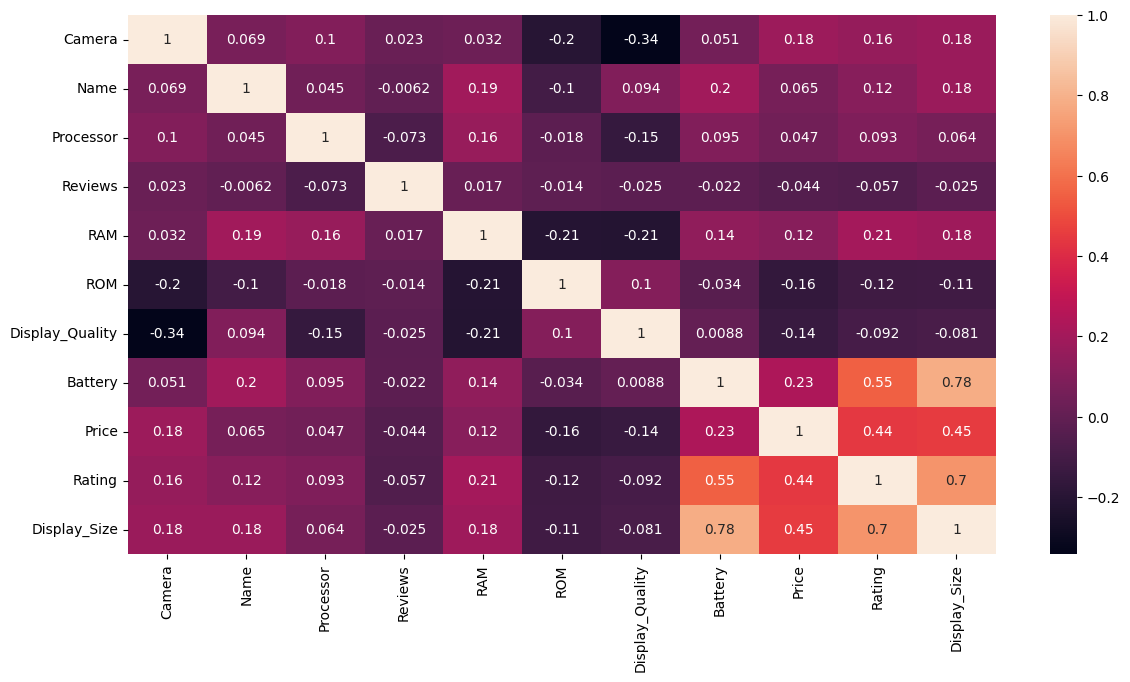

In [248]:
plt.figure(figsize=(14,7))
sns.heatmap(df_label.corr(),annot=True)

<Axes: xlabel='Price', ylabel='Rating'>

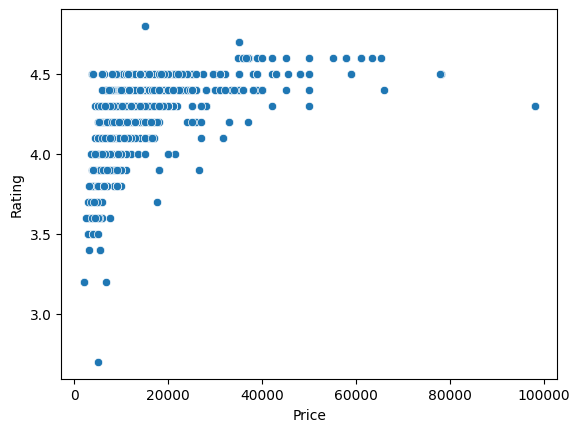

In [249]:
sns.scatterplot(x='Price', y='Rating', data=df)

From the above scatter plot we can consider that most of the people under 20000 thosand phone and maximum percentage of rating is by this region of people only .

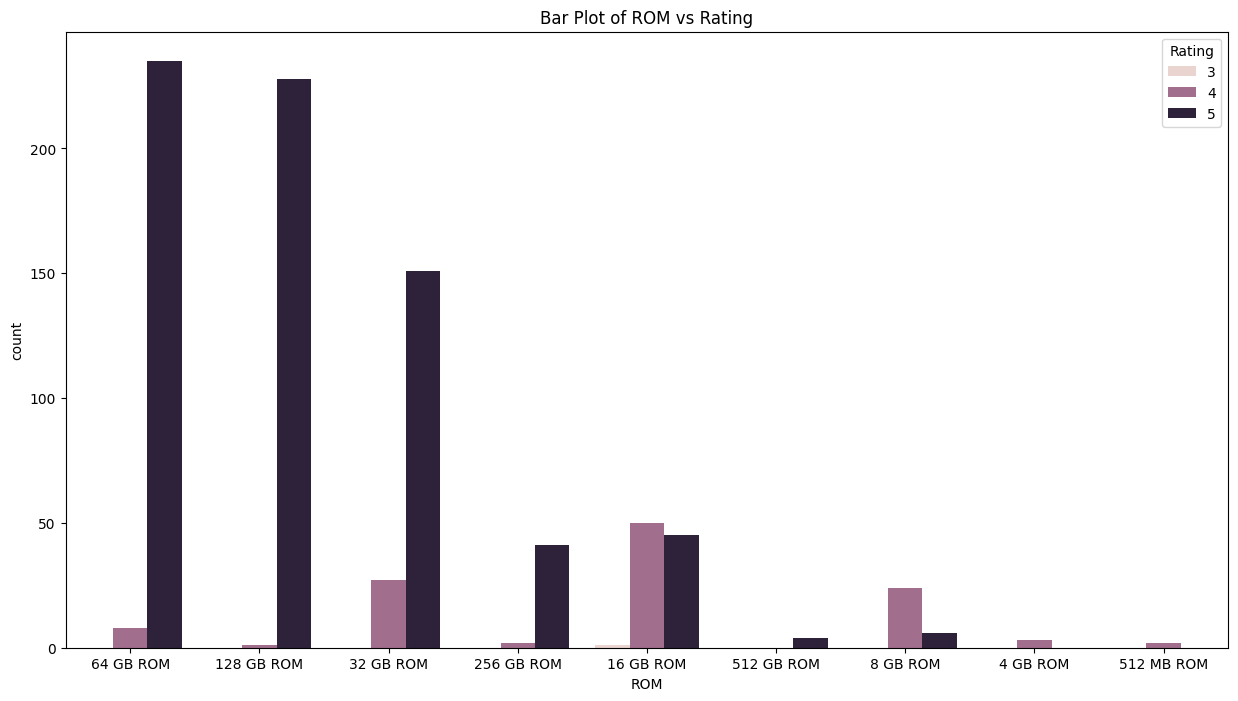

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(15,8))
sns.countplot(x='ROM', hue='Rating', data=df)
plt.title("Bar Plot of ROM vs Rating")
plt.show()









From the above Bar plot we can conclude that maximum rating is given by people having a ROM of 64GB and 128GB.

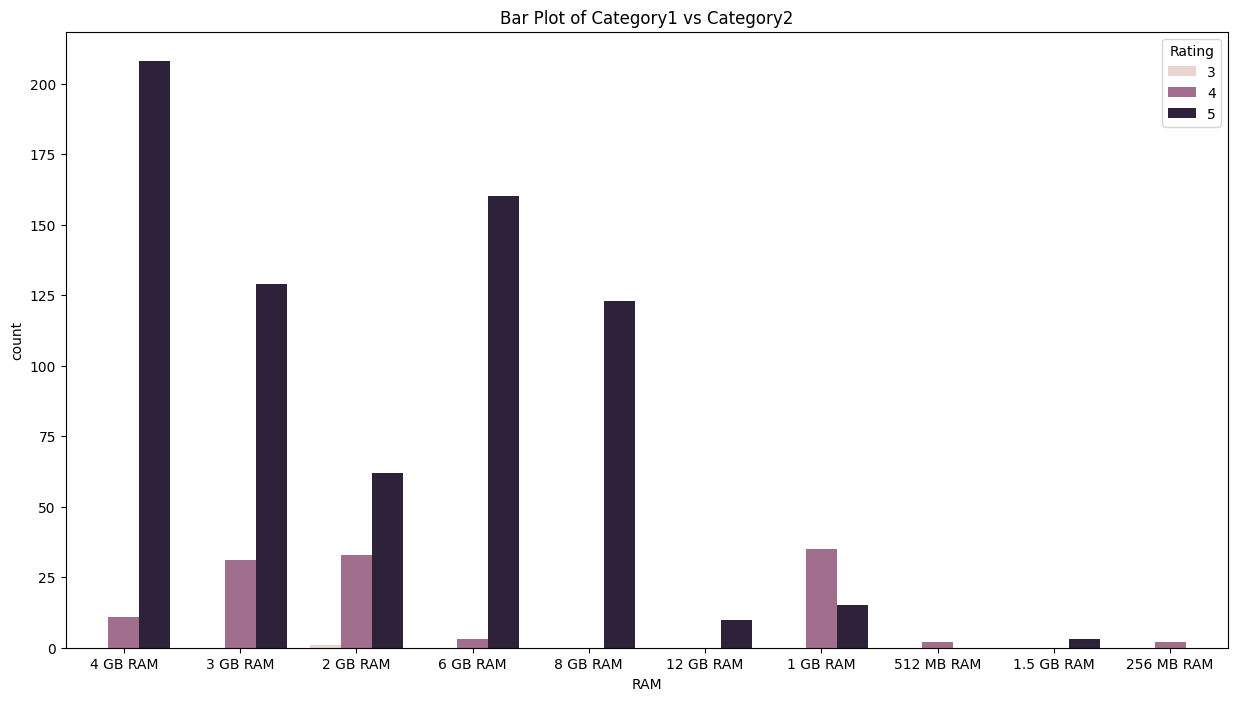

In [269]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))

sns.countplot(x='RAM', hue='Rating', data=df)
plt.title("Bar Plot of Category1 vs Category2")
plt.show()

From the above Bar plot we can conclude that maximum rating is given by people having a phone of 4GB of RAM and thus we can also conclude that most people are prefer to buy a phone of having 4GB of RAM.

In [252]:
df.columns

Index(['Battery', 'Camera', 'Name', 'Price', 'Processor', 'Rating', 'Reviews',
       'RAM', 'ROM', 'Display_Size', 'Display_Quality'],
      dtype='object')

# Predicting Rating

In [253]:
df.isnull().sum()/len(df)*100

,0
Battery,0.0
Camera,0.0
Name,0.0
Price,0.0
Processor,0.0
Rating,0.0
Reviews,0.0
RAM,0.0
ROM,0.0
Display_Size,0.0


In [254]:
df.Rating=np.ceil(df['Rating']).astype(int)

In [255]:
x=df.drop(['Rating'],axis= 1)
y=df[['Rating']]

In [256]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [257]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [258]:
oe=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train=oe.fit_transform(x_train)
X_test=oe.transform(x_test)

In [259]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           4       0.96      0.41      0.57        54
           5       0.78      0.99      0.87       112

    accuracy                           0.80       166
   macro avg       0.87      0.70      0.72       166
weighted avg       0.83      0.80      0.77       166



#Hyper Tuning the model

In [260]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=50)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


By doing a hyper tuning we get this parameter and by  doing this feature engineering we can improve the accuracy of the model.

max_depth=9, max_features='log2', max_leaf_nodes=9,
                       n_estimators=25)

In [261]:
model=RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=25)
oe=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
pipe=Pipeline([('encode',oe),('clf',model)])
pipe.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('encode',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('clf',
                 RandomForestClassifier(max_depth=6, max_features='log2',
                                        max_leaf_nodes=9, n_estimators=25))])

In [262]:
y_pred=pipe.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           4       0.91      0.72      0.81        29
           5       0.94      0.99      0.96       137

    accuracy                           0.94       166
   macro avg       0.93      0.85      0.89       166
weighted avg       0.94      0.94      0.94       166



By hyper tuning the parameter  model accuracy get increase by 4% which is get increase by 85% to 89% which is great.
